<a href="https://colab.research.google.com/github/lisatwyw/gpython/blob/main/kepler_osmnx_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) KeplerGL

In [8]:
!pip install keplergl==0.3.2

  Using cached keplergl-0.3.2-py2.py3-none-any.whl
  Using cached tomli-2.0.1-py3-none-any.whl.metadata (8.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.3/817.3 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.4/295.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
from google.colab import output
output.enable_custom_widget_manager()

## Download config.py + data.csv files

In [15]:
!wget https://raw.githubusercontent.com/keplergl/kepler.gl/master/bindings/kepler.gl-jupyter/notebooks/hex_config.py


--2024-06-04 22:03:04--  https://raw.githubusercontent.com/keplergl/kepler.gl/master/bindings/kepler.gl-jupyter/notebooks/hex_config.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1723 (1.7K) [text/plain]
Saving to: ‘hex_config.py’

hex_config.py       100%[===================>]   1.68K  --.-KB/s    in 0s      

2024-06-04 22:03:04 (23.2 MB/s) - ‘hex_config.py’ saved [1723/1723]



In [11]:
!wget https://raw.githubusercontent.com/keplergl/kepler.gl/master/bindings/kepler.gl-jupyter/notebooks/hex-data.csv

--2024-06-04 22:02:18--  https://raw.githubusercontent.com/keplergl/kepler.gl/master/bindings/kepler.gl-jupyter/notebooks/hex-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3886 (3.8K) [text/plain]
Saving to: ‘hex-data.csv’

hex-data.csv        100%[===================>]   3.79K  --.-KB/s    in 0s      

2024-06-04 22:02:18 (41.2 MB/s) - ‘hex-data.csv’ saved [3886/3886]



## Execute the configuration script

In [3]:
%run hex_config.py

In [4]:
config

{'version': 'v1',
 'config': {'visState': {'layers': [{'type': 'hexagonId',
     'visualChannels': {'sizeField': {'type': 'integer', 'name': 'value'},
      'coverageField': None,
      'colorScale': 'quantize',
      'coverageScale': 'linear',
      'colorField': {'type': 'integer', 'name': 'value'},
      'sizeScale': 'linear'},
     'config': {'dataId': 'data_1',
      'color': [250, 116, 0],
      'textLabel': {'color': [255, 255, 255],
       'field': None,
       'size': 50,
       'anchor': 'middle',
       'offset': [0, 0]},
      'label': 'H3 Hexagon',
      'isVisible': True,
      'visConfig': {'coverageRange': [0, 1],
       'opacity': 0.8,
       'elevationScale': 5,
       'hi-precision': False,
       'coverage': 1,
       'enable3d': True,
       'sizeRange': [0, 500],
       'colorRange': {'category': 'Uber',
        'type': 'sequential',
        'colors': ['#194266',
         '#355C7D',
         '#63617F',
         '#916681',
         '#C06C84',
         '#D28389',
  

In [5]:
import pandas as pd
df = pd.read_csv('hex-data.csv')
df

,hex_id,value,is_true,float_value,empty,time
0,89283082c2fffff,64,True,64.1,NaN,11/1/17 11:00
1,8928308288fffff,73,True,73.1,NaN,11/1/17 11:00
2,89283082c07ffff,65,True,65.1,NaN,11/1/17 11:00
3,89283082817ffff,74,True,74.1,NaN,11/1/17 11:00
4,89283082c3bffff,66,True,66.1,NaN,11/1/17 11:00
...,...,...,...,...,...,...
83,8928309537bffff,4,True,4.1,NaN,11/1/17 11:00
84,89283082d93ffff,6,True,6.1,NaN,11/1/17 11:00
85,89283082d73ffff,1,True,1.1,NaN,11/1/17 13:00
86,8928309530bffff,1,True,1.1,NaN,11/1/17 11:00


In [65]:
from keplergl import KeplerGl
map_1 = KeplerGl(height=400 )
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

# 2) OSMNX

In [4]:
!pip install -q condacolab geopandas contextily matplotlib==3.3

import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting kernel...


In [61]:
!mamba install osmnx[matplotlib]


Looking for: ['osmnx']

[+] 0.0s
[+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.2s
conda-forge/linux-64   7%
conda-forge/noarch    ⣾  [+] 0.3s
conda-forge/linux-64  11%
conda-forge/noarch    10%[+] 0.4s
conda-forge/linux-64  16%
conda-forge/noarch    20%[+] 0.5s
conda-forge/linux-64  20%
conda-forge/noarch    32%[+] 0.6s
conda-forge/linux-64  25%
conda-forge/noarch    43%[+] 0.7s
conda-forge/linux-64  30%
conda-forge/noarch    43%[+] 0.8s
conda-forge/linux-64  35%
conda-forge/noarch    54%[+] 0.9s
conda-forge/linux-64  35%
conda-forge/noarch    65%[+] 1.0s
conda-forge/linux-64  39%
conda-forge/noarch    65%[+] 1.1s
conda-forge/linux-64  44%
conda-forge/noarch    76%[+] 1.2s
conda-forge/linux-64  44%
conda-forge/noarch    87%[+] 1.3s
conda-forge/linux-64  49%
conda-forge/noarch    87%conda-forge/noarch                                
[+] 1.4s
conda-forge/linux-64  53%[+] 1.5s
conda-forge/linux-64  58%[+] 1.6s
conda-forge/linux-64  67%[+] 1.7s
conda-forge/linux-64  72

In [9]:
import osmnx as ox
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
import tempfile
import geopandas as gpd
import networkx as nx
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import contextily as ctx

In [54]:
ox.__version__

'1.9.3'

# Example 1

## Load GraphML file

In [181]:
%%time
ox.config(use_cache=True, log_console=True)

tags = {'building': False, 'highway': True, 'landuse': False }

d = 2000 # in meters
G0 = ox.graph_from_address('655 W 12th Ave, Vancouver, BC V5Z 4R4', network_type = 'bike', dist=d )

<timed exec>:1: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123


CPU times: user 6.99 s, sys: 37 ms, total: 7.03 s
Wall time: 7.03 s


## Calculate speed limits, project to CRS3857, and compute graphs



In [182]:
%%time

# add travel time based on maximum speed
G0 = ox.add_edge_speeds(G0)
G0 = ox.add_edge_travel_times(G0)

# change map projection to Pseudo-Mercator
# this projection is used by most base map tile providers
G0 = ox.projection.project_graph(G0, to_crs=3857)

# get nodes, edges as Geo data frame
gdf_nodes0, gdf_edges0 = ox.graph_to_gdfs(G0)

CPU times: user 2.39 s, sys: 3.4 ms, total: 2.39 s
Wall time: 2.46 s


In [183]:
gdf_nodes0

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
25251495,6.317419e+06,-1.370778e+07,3,-123.139073,49.250178,NaN,POINT (-13707778.870 6317418.542)
571700125,6.317409e+06,-1.370751e+07,4,-123.136669,49.250121,NaN,POINT (-13707511.324 6317408.719)
247688472,6.317532e+06,-1.370778e+07,4,-123.139051,49.250845,NaN,POINT (-13707776.421 6317532.257)
11102806915,6.317306e+06,-1.370778e+07,4,-123.139100,49.249518,NaN,POINT (-13707781.909 6317305.954)
25251496,6.317243e+06,-1.370649e+07,4,-123.127532,49.249149,NaN,POINT (-13706494.109 6317242.992)
...,...,...,...,...,...,...,...
11725895629,6.321382e+06,-1.370627e+07,1,-123.125551,49.273413,NaN,POINT (-13706273.608 6321381.909)
11754441723,6.321729e+06,-1.370477e+07,1,-123.112050,49.275446,NaN,POINT (-13704770.705 6321728.679)
11766503038,6.321412e+06,-1.370701e+07,1,-123.132140,49.273588,NaN,POINT (-13707007.136 6321411.716)


## Plot the graph nodes

<AxesSubplot:title={'center':'Street counts near BCCDC'}>

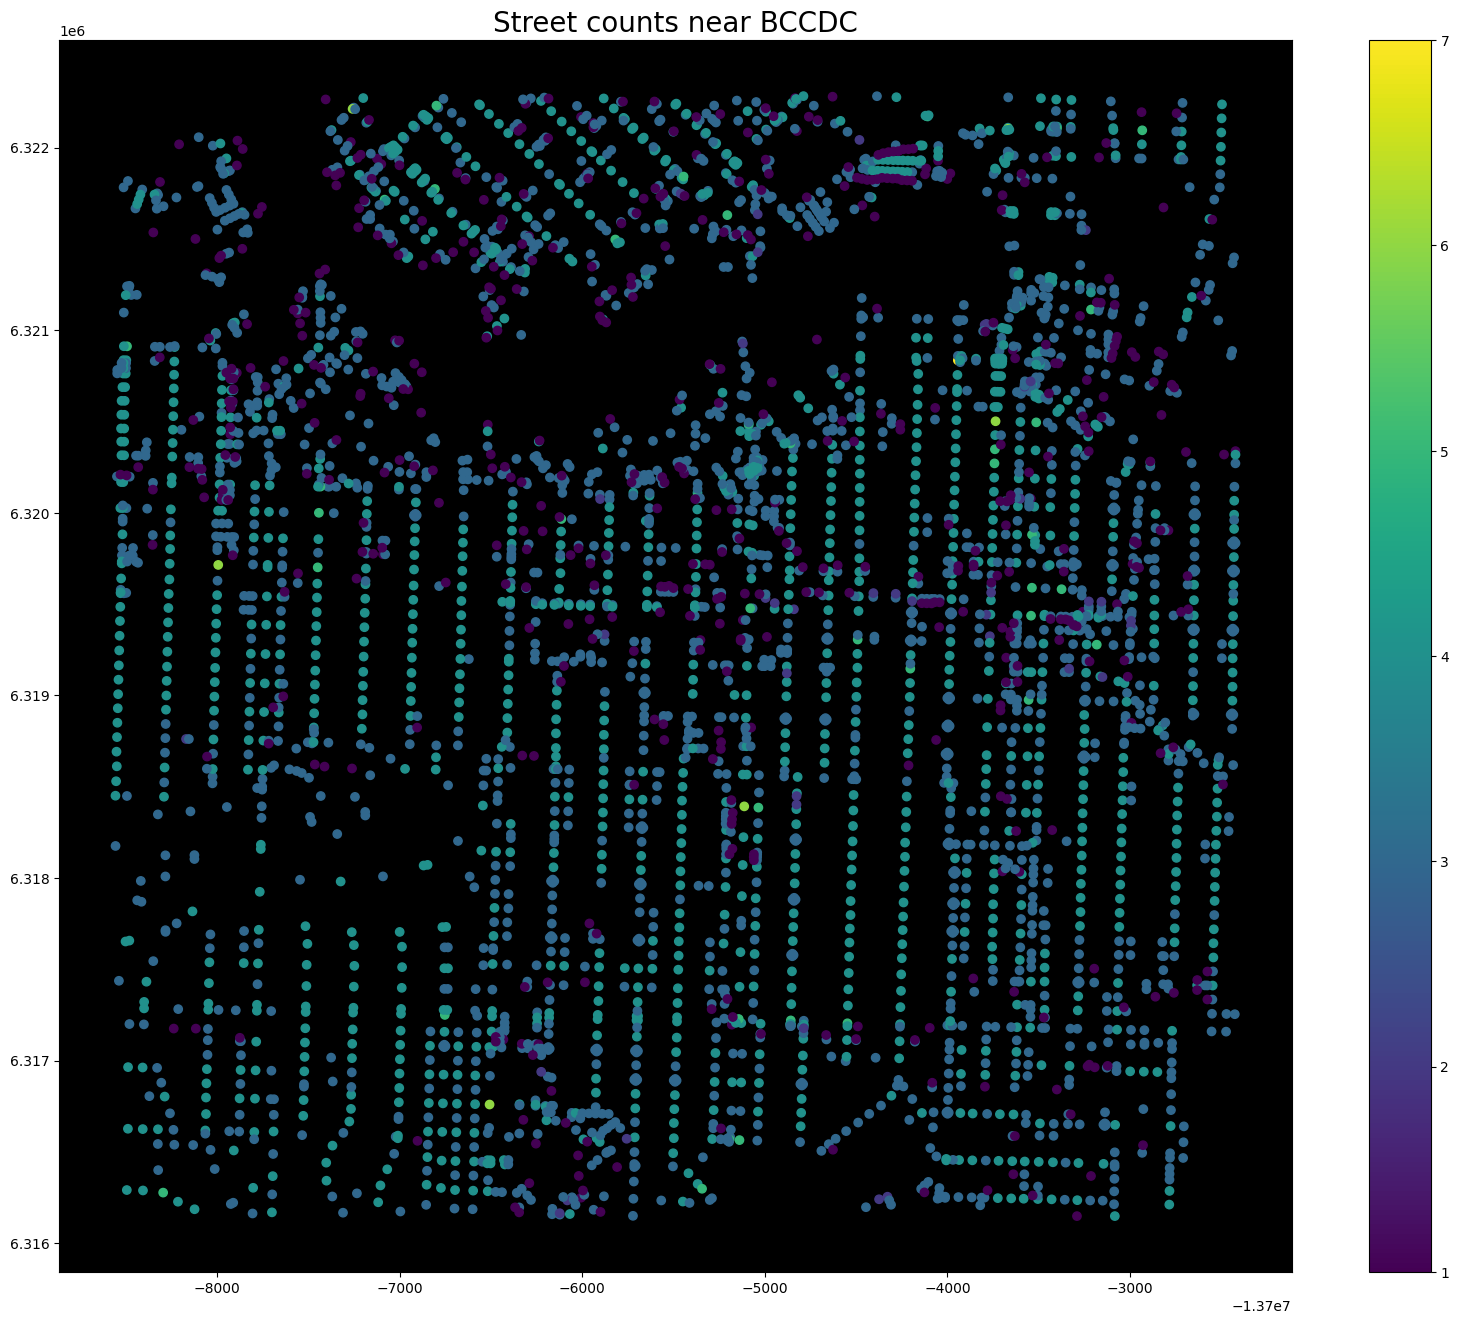

In [184]:
fig = plt.figure(figsize=(20,16))
ax = plt.axes()
ax.set(facecolor = "black")

ax.set_title("Street counts near BCCDC", fontsize=20)
gdf_nodes0[gdf_nodes0.street_count > 0].plot(ax=ax, cmap="viridis", column="street_count", legend=True)

In [190]:
gdf_edges0.highway.describe()

count           11088
unique             23
top       residential
freq             4334
Name: highway, dtype: object

<AxesSubplot:title={'center':'Residential roads near BCCDC'}>

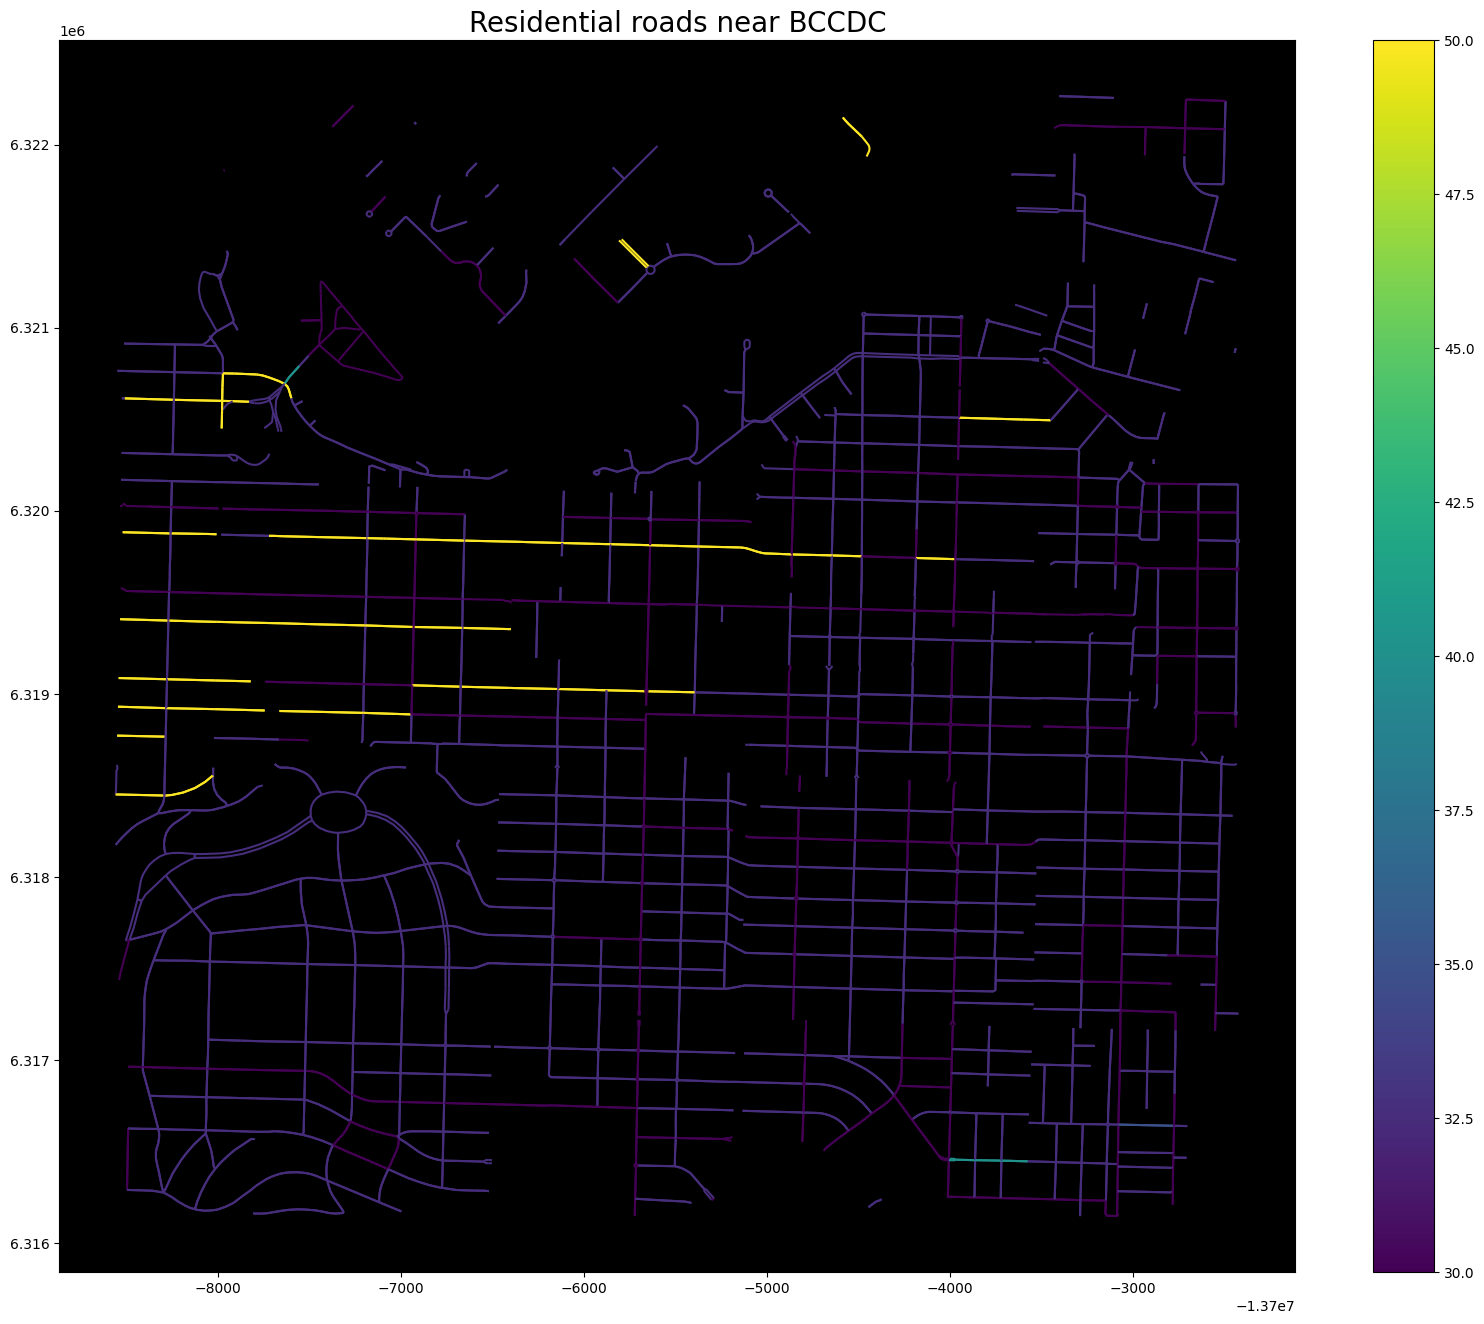

In [195]:
A = gdf_edges0[gdf_edges0.highway == 'residential']

fig = plt.figure(figsize=(20,16))
ax = plt.axes()

ax.set(facecolor = "black")
ax.set_title("Residential roads near BCCDC", fontsize=20)
A.plot(ax=ax, cmap="viridis", column="speed_kph", legend=True)

# Example 2

In [176]:
%%time
ox.config(use_cache=True, log_console=True)

tags = {'building': False, 'highway': True, 'landuse': False }

d = 2000 # in meters
G2 = ox.graph_from_address('655 W 12th Ave, Vancouver, BC V5Z 4R4', network_type = 'all', dist=d )

# get nodes, edges as Geo data frame
gdf_nodes2, gdf_edges2 = ox.graph_to_gdfs(G2)


<timed exec>:1: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123


CPU times: user 21.5 s, sys: 113 ms, total: 21.7 s
Wall time: 24.6 s


In [178]:
%%time

# add travel time based on maximum speed
G2 = ox.add_edge_speeds(G2)
G2 = ox.add_edge_travel_times(G2)

# change map projection to Pseudo-Mercator
# this projection is used by most base map tile providers
G2 = ox.projection.project_graph(G2, to_crs=3857)


CPU times: user 8.41 s, sys: 32.2 ms, total: 8.44 s
Wall time: 8.58 s


In [179]:
%%time

# get edges as Geo data frame
gdf_nodes2, gdf_edges2 = ox.graph_to_gdfs(G2)
gdf_edges2.speed_kph

CPU times: user 4.11 s, sys: 36.1 ms, total: 4.15 s
Wall time: 4.12 s


u            v            key
25251495     8562383178   0      20.7
             11406485900  0      50.0
             8656592645   0      50.0
8562383178   25251495     0      20.7
             8562383180   0      41.3
                                 ... 
11885382647  11885382641  0      41.3
             11885382655  0      41.3
11899717480  11899717475  0      41.3
11921431389  11921431410  0      41.3
11921431408  11921431409  0      41.3
Name: speed_kph, Length: 47916, dtype: float64

<AxesSubplot:title={'center':'Roads near BCCDC with maximum speed less than 30 km/h'}>

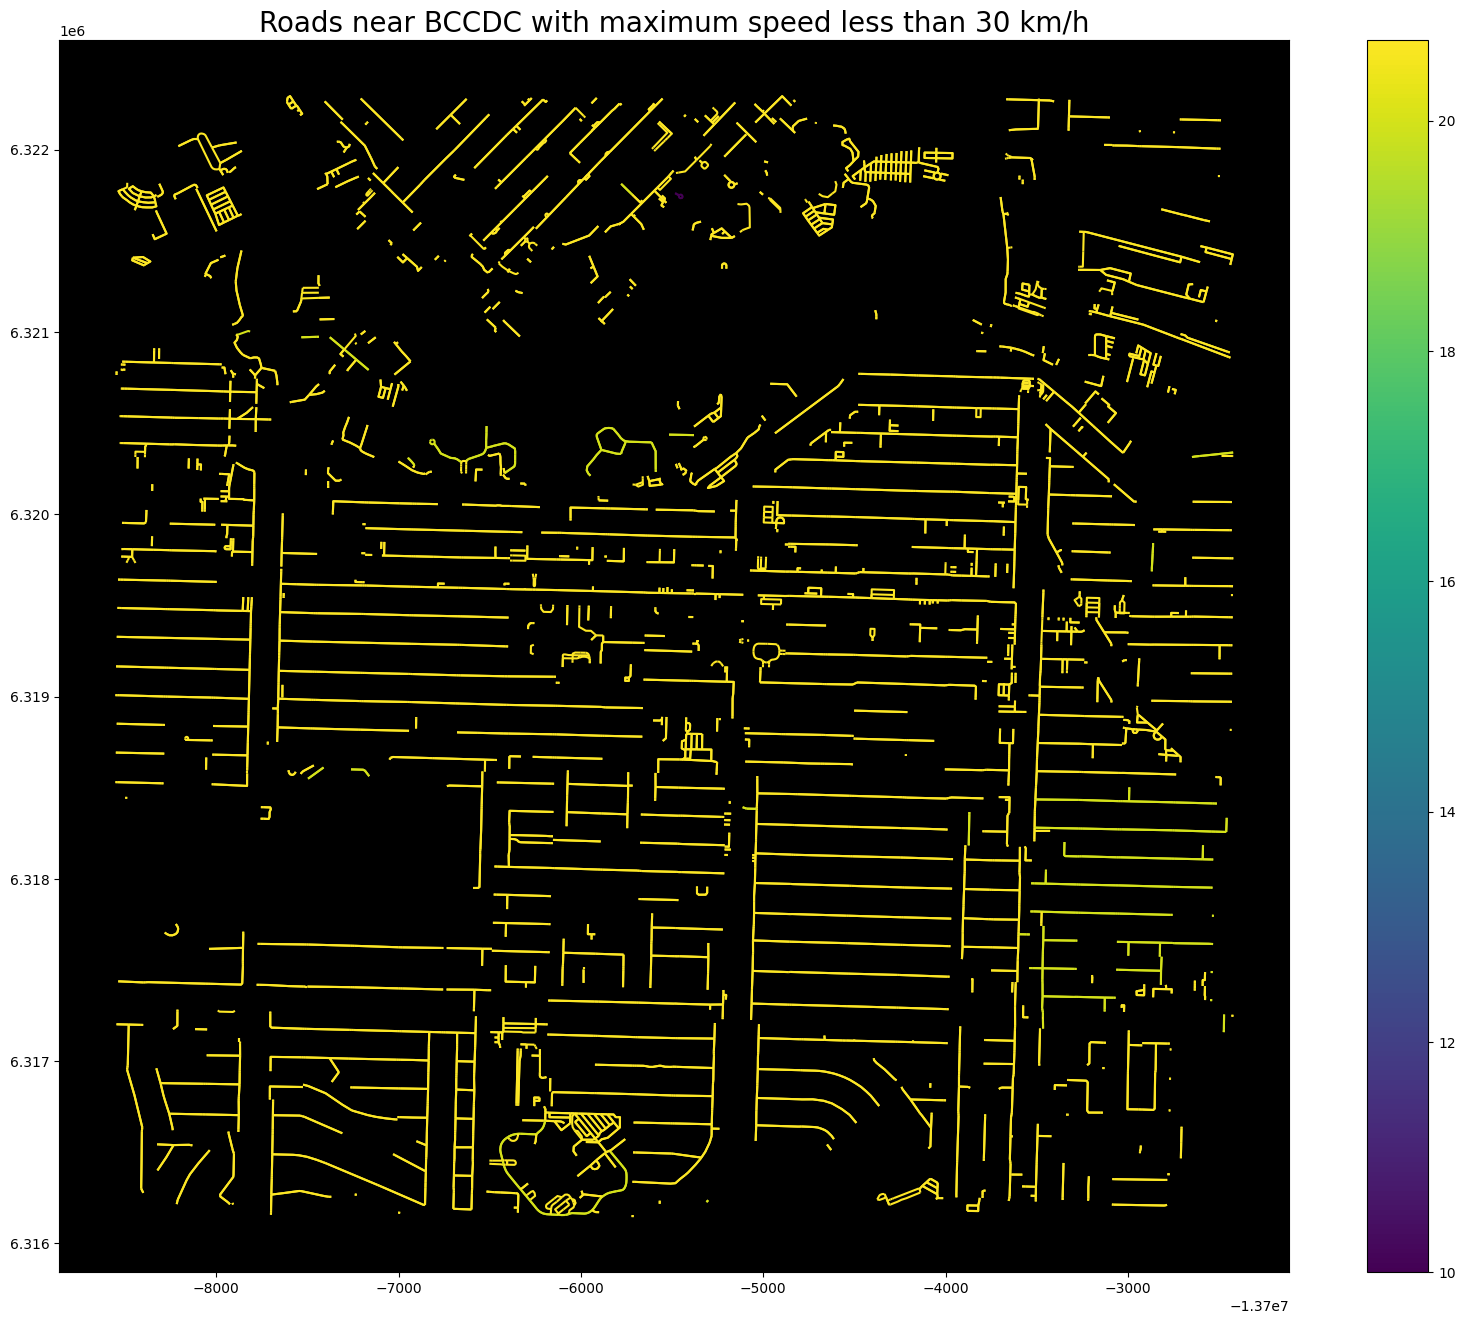

In [180]:
fig = plt.figure(figsize=(20,16))
ax = plt.axes()

ax.set(facecolor = "black")
ax.set_title("Roads near BCCDC with maximum speed less than 30 km/h", fontsize=20)
gdf_edges2[gdf_edges2.speed_kph < 30].plot(ax=ax, cmap="viridis", column="speed_kph", legend=True)

# Example 3: Sydney

In [67]:
origin_address = "Pyrmont, NSW"

## Load GraphML file

In [69]:
zipurl = 'https://github.com/maxim75/data-visualization/raw/master/notebooks/data/sydney_drive.graphml.zip'

# download ZIP file, unzip it into temp directory and load network from file
with urlopen(zipurl) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        with tempfile.TemporaryDirectory() as tempdir:
            zfile.extractall(tempdir)
            G = ox.load_graphml(f"{tempdir}/sydney_drive.graphml")

## Configure network

In [70]:
# add travel time based on maximum speed
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

# change map projection to Pseudo-Mercator
# this projection is used by most base map tile providers
G = ox.projection.project_graph(G, to_crs=3857)

## Plot of Roads with maximum speed more than 50 km/h

In [115]:
%%time

# get edges as Geo data frame
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_edges.speed_kph

u           v           key
771347      1612748582  0      110.0
1612748582  1590127318  0      110.0
12040554    2332995333  0       60.0
            2332995172  0       55.3
2332995333  448101783   0       60.0
                               ...  
8850593545  8850593546  0       49.3
8983262103  8983262103  0       46.2
                        1       46.2
            8983262057  0       46.2
9007445981  9007445980  0       49.3
Name: speed_kph, Length: 259339, dtype: float64

<AxesSubplot:title={'center':'Roads in Sydney with maximum speed more than 50 km/h'}>

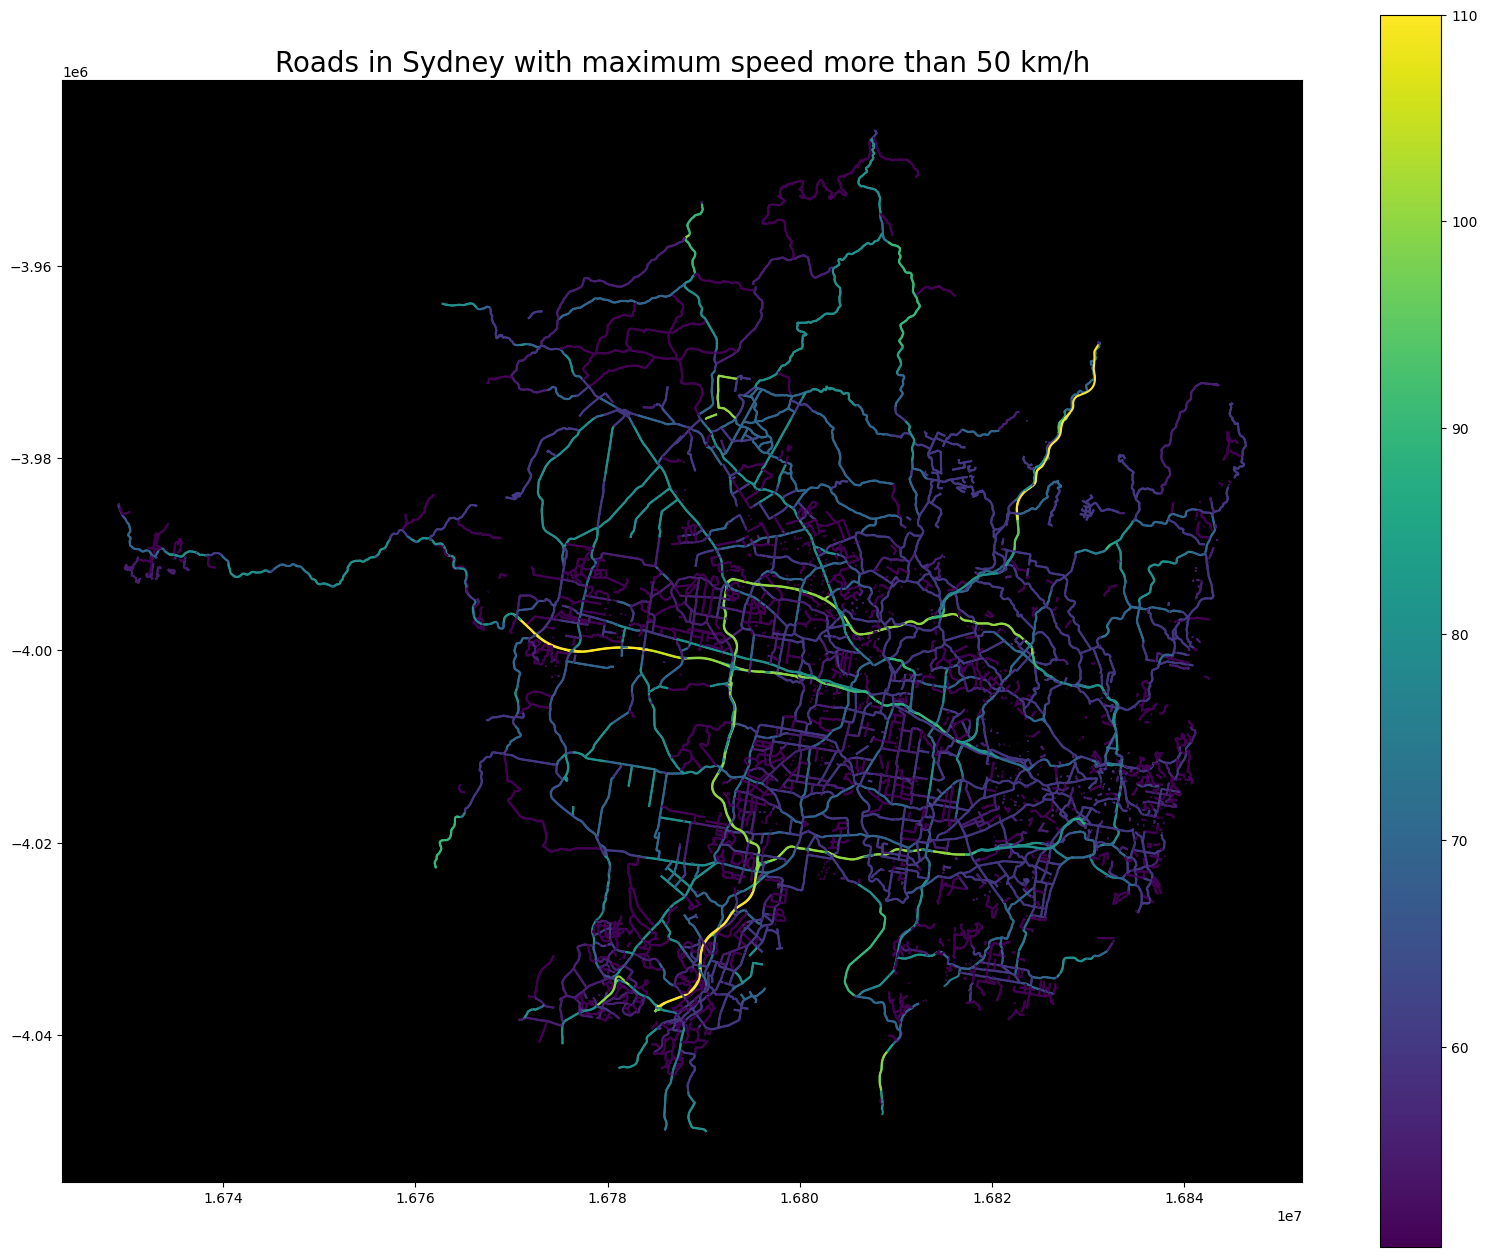

In [71]:
fig = plt.figure(figsize=(20,16))
ax = plt.axes()

ax.set(facecolor = "black")
ax.set_title("Roads in Sydney with maximum speed more than 50 km/h", fontsize=20)
gdf_edges[gdf_edges.speed_kph > 50].plot(ax=ax, cmap="viridis", column="speed_kph", legend=True)

# Task: find travel times between origin and destination points

## Set origin point

In [13]:
# converts string address into geographocal coordinates
def geocode_address(address, crs=4326):
    geocode = gpd.tools.geocode(address, provider='nominatim', user_agent="drive time demo").to_crs(crs)
    return (geocode.iloc[0].geometry.y, geocode.iloc[0].geometry.x)

# find origin network node
origin_coordinates = geocode_address(origin_address, crs=3857)
origin_node_id = ox.distance.nearest_nodes(G, origin_coordinates[1], origin_coordinates[0])

## Find travel times

In [14]:
# find travel times and route to each node in network
(travel_times, routes) = nx.single_source_dijkstra(G, origin_node_id, weight="travel_time")

# set travel_time in minutes as attribute to each network node
for node_id in travel_times:
    G.nodes.get(node_id)["travel_time"] = travel_times[node_id]/60

# get nodes and edges as Geo data frame
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

# find longest travel time
max_time_sec = max(travel_times.values())/60

# Task: Visualize travel times via a heatmap

Text(0.5, 1.0, 'Driving time in minutes from Pyrmont, NSW accross Greater Sydney')

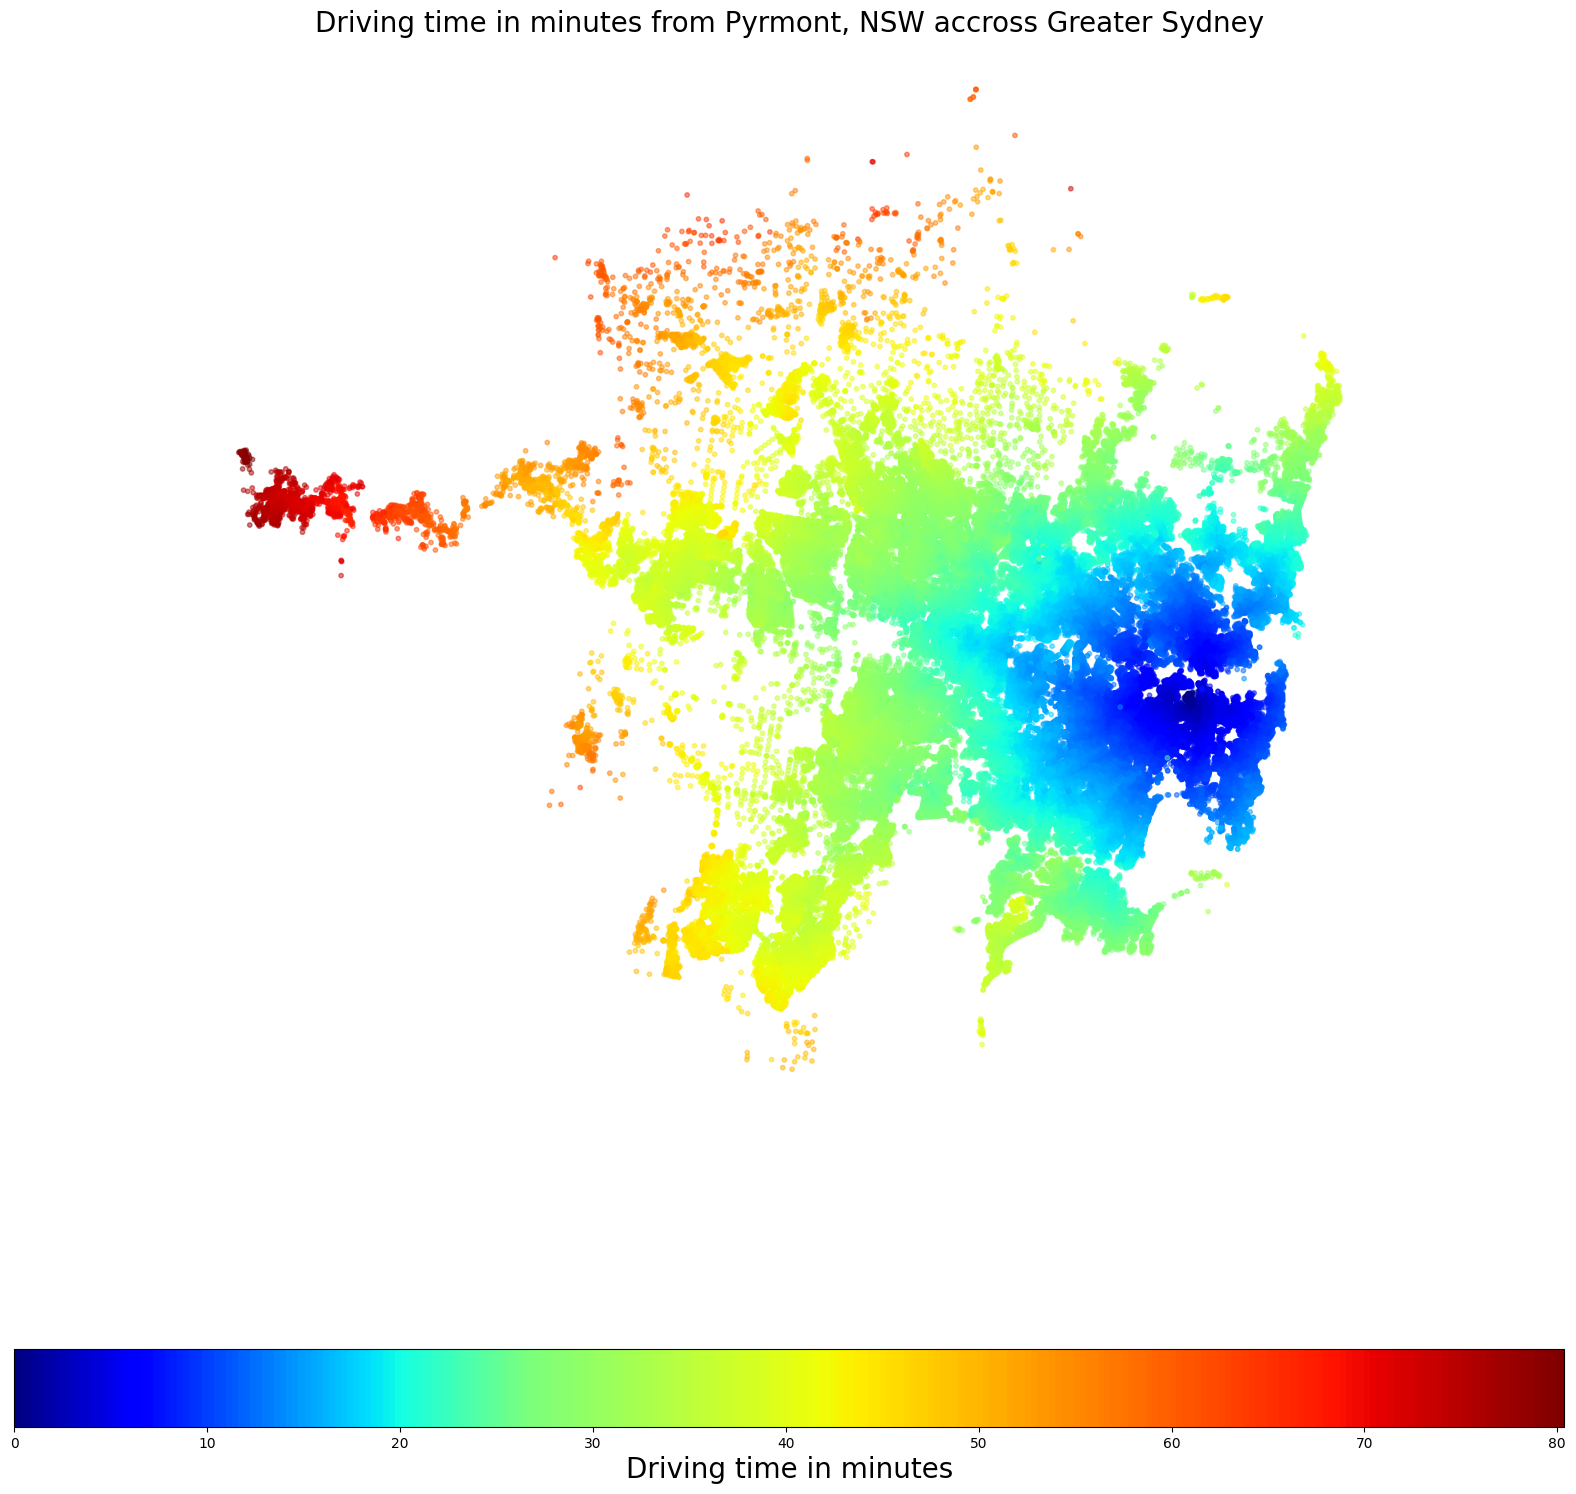

In [17]:
# define color scale using minimum and maximum travel times
norm = mcolors.TwoSlopeNorm(vmin=0, vcenter=max_time_sec/3, vmax=max_time_sec)

fig = plt.figure(figsize=(20,20))
ax = plt.axes()

# hide x and y axis
ax.set_axis_off()

# add colotbat showing travel time and corresponding colour
cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap="jet"),
    ax=ax, orientation='horizontal')

# plot each node with color indicating travel time
gdf_nodes.plot(ax=ax,
    column="travel_time", cmap="jet", norm=norm, s=10, alpha=.5)

# add basemap with location labels
# ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLines, alpha=.3)
# ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLabels)

cb.set_label('Driving time in minutes', fontsize = 20)
ax.set_title("Driving time in minutes from Pyrmont, NSW accross Greater Sydney", fontsize=20)

In [18]:
!pip freeze > requirements.txt
!cat requirements.txt

affine @ file:///home/conda/feedstock_root/build_artifacts/affine_1674245120525/work
anyio==4.4.0
archspec @ file:///home/conda/feedstock_root/build_artifacts/archspec_1699370045702/work
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs @ file:///home/conda/feedstock_root/build_artifacts/attrs_1704011227531/work
Babel==2.15.0
beautifulsoup4==4.12.3
bleach==6.1.0
boltons @ file:///home/conda/feedstock_root/build_artifacts/boltons_1703154663129/work
branca @ file:///home/conda/feedstock_root/build_artifacts/branca_1714071803448/work
Brotli @ file:///home/conda/feedstock_root/build_artifacts/brotli-split_1695989787169/work
certifi @ file:///home/conda/feedstock_root/build_artifacts/certifi_1707022139797/work/certifi
cffi @ file:///home/conda/feedstock_root/build_artifacts/cffi_1696001684923/work
charset-normalizer @ file:///home/conda/feedstock_root/build_artifacts/charset-normalizer_1698833585322/work
click @ file:///home/conda/feedstoc